# **Fetch Rewards Coding Exercise - Data Analyst**

## **Import Libraries and Files Upload**

In [1]:
import pandas as pd
import json
from google.colab import files
from IPython.display import Image, display, HTML

In [2]:
# Upload the receipts, brands and users file
from google.colab import files
uploaded = files.upload()


Saving brands.json to brands.json
Saving receipts.json to receipts.json
Saving users.json to users.json


# **E-R Diagram**

In [3]:
images = files.upload()

Saving ERD.png to ERD.png


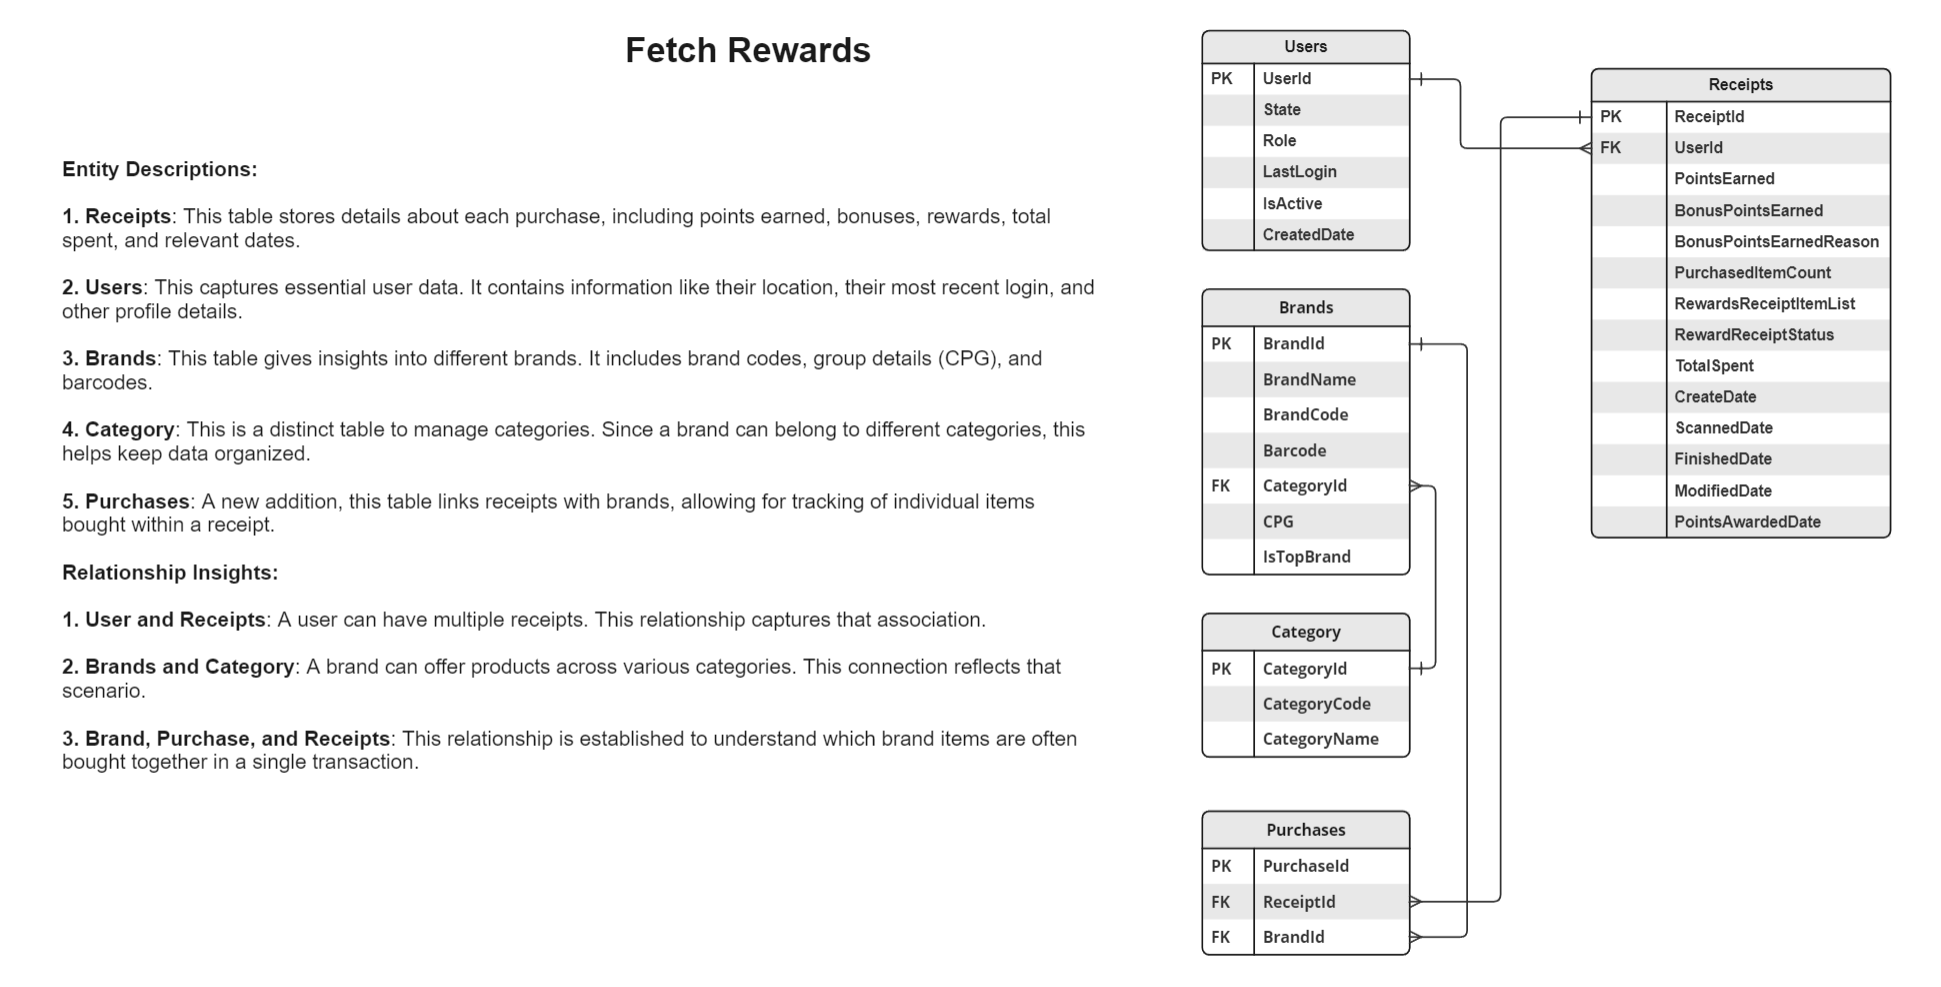

In [4]:
for filename in images.keys():
    display(Image(filename, width=1500, height= 750))

# **Helper Functions**

In [5]:
# Unwrap _id column
def unwrap_id(df):
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
    return df


In [6]:
# Unwrap the dictionary of $date and get the dates in datetime format
def extract_date(value):
    # Check if value is not NaN and is of type dict
    if pd.notna(value) and isinstance(value, dict) and '$date' in value:
        return pd.to_datetime(value['$date'], unit='ms')
    return value

In [7]:
# Convert JSON to a dataframe
def json_to_df(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Parse each line
    data = [json.loads(line) for line in lines]

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)

    return df

In [8]:
# Calculate missing values percentages
def calculate_missing_percentages(df):
    # Calculate the percentage of missing values for each column
    missing_values = df.isnull().mean() * 100
    return missing_values[missing_values > 0]

In [9]:
#Check Duplicates
def check_duplicates(df, name):
    duplicates_count = df.astype(str).duplicated().sum()
    return (name, duplicates_count)

# **Receipts , Brands and Users**

In [10]:
receipts_df = json_to_df('receipts.json')

# Display the first few rows to understand structure
print(receipts_df.head())

# Get general info about data types and non-null values
print(receipts_df.info())

                                    _id  bonusPointsEarned  \
0  {'$oid': '5ff1e1eb0a720f0523000575'}              500.0   
1  {'$oid': '5ff1e1bb0a720f052300056b'}              150.0   
2  {'$oid': '5ff1e1f10a720f052300057a'}                5.0   
3  {'$oid': '5ff1e1ee0a7214ada100056f'}                5.0   
4  {'$oid': '5ff1e1d20a7214ada1000561'}                5.0   

                             bonusPointsEarnedReason  \
0  Receipt number 2 completed, bonus point schedu...   
1  Receipt number 5 completed, bonus point schedu...   
2                         All-receipts receipt bonus   
3                         All-receipts receipt bonus   
4                         All-receipts receipt bonus   

                 createDate               dateScanned  \
0  {'$date': 1609687531000}  {'$date': 1609687531000}   
1  {'$date': 1609687483000}  {'$date': 1609687483000}   
2  {'$date': 1609687537000}  {'$date': 1609687537000}   
3  {'$date': 1609687534000}  {'$date': 1609687534000}   
4  {'

**Receipts have the id column stored as a dictionary , so need to unwrap the column to make it usable , date columns are stored as objects, convert them into consistent datetime columns, some numerical columns contains string values, need to make them into float values**

In [25]:
date_columns = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']

for col in date_columns:
    receipts_df[col] = receipts_df[col].apply(extract_date)

unwrap_id(receipts_df)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31.000,2021-01-03 15:25:31.000,2021-01-03 15:25:31,2021-01-03 15:25:36.000,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43.000,2021-01-03 15:24:43.000,2021-01-03 15:24:43,2021-01-03 15:24:48.000,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37.000,2021-01-03 15:25:37.000,NaT,2021-01-03 15:25:42.000,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34.000,2021-01-03 15:25:34.000,2021-01-03 15:25:34,2021-01-03 15:25:39.000,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06.000,2021-01-03 15:25:06.000,2021-01-03 15:25:11,2021-01-03 15:25:11.000,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 10:22:27.000,2021-03-01 10:22:27.000,NaT,2021-03-01 10:22:28.000,NaT,25.0,2020-08-17 00:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,603d0b710a720fde1000042a,NaN,NaN,2021-03-01 15:42:41.873,2021-03-01 15:42:41.873,NaT,2021-03-01 15:42:41.873,NaT,NaN,NaT,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,603cf5290a720fde10000413,NaN,NaN,2021-03-01 14:07:37.664,2021-03-01 14:07:37.664,NaT,2021-03-01 14:07:37.664,NaT,NaN,NaT,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28.000,2021-03-01 13:07:28.000,NaT,2021-03-01 13:07:29.000,NaT,25.0,2020-08-17 00:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [12]:
calculate_missing_percentages(receipts_df)

bonusPointsEarned          51.385165
bonusPointsEarnedReason    51.385165
finishedDate               49.240393
pointsAwardedDate          52.010724
pointsEarned               45.576408
purchaseDate               40.035746
purchasedItemCount         43.252904
rewardsReceiptItemList     39.320822
totalSpent                 38.873995
dtype: float64

```
Receipt Missing Values:

bonusPointsEarned          51.4%
bonusPointsEarnedReason    51.4%
finishedDate               49.2%
pointsAwardedDate          52.0%
pointsEarned               45.6%
purchaseDate               40.0%
purchasedItemCount         43.2%
rewardsReceiptItemList     39.3%
totalSpent                 38.9%
```
High Percentages of Missing Values found across the table in all major columns.
It is critical to understand the business logic to impute the missing values as removing major chunk of data is not recommended.

In [13]:
check_duplicates(receipts_df, "Receipts Data")

('Receipts Data', 0)

In [14]:
# Converting columns to numeric
receipts_df['pointsEarned'] = pd.to_numeric(receipts_df['pointsEarned'], errors='coerce')
receipts_df['totalSpent'] = pd.to_numeric(receipts_df['totalSpent'], errors='coerce')

# Checking the data types of these columns after conversion
print(receipts_df.dtypes)

_id                                object
bonusPointsEarned                 float64
bonusPointsEarnedReason            object
createDate                 datetime64[ns]
dateScanned                datetime64[ns]
finishedDate               datetime64[ns]
modifyDate                 datetime64[ns]
pointsAwardedDate          datetime64[ns]
pointsEarned                      float64
purchaseDate               datetime64[ns]
purchasedItemCount                float64
rewardsReceiptItemList             object
rewardsReceiptStatus               object
totalSpent                        float64
userId                             object
dtype: object


In [15]:
brands_df = json_to_df('brands.json')

# Display the first few rows to understand structure
print(brands_df.head())

# Get general info about data types and non-null values
print(brands_df.info())

                                    _id       barcode        category  \
0  {'$oid': '601ac115be37ce2ead437551'}  511111019862          Baking   
1  {'$oid': '601c5460be37ce2ead43755f'}  511111519928       Beverages   
2  {'$oid': '601ac142be37ce2ead43755d'}  511111819905          Baking   
3  {'$oid': '601ac142be37ce2ead43755a'}  511111519874          Baking   
4  {'$oid': '601ac142be37ce2ead43755e'}  511111319917  Candy & Sweets   

       categoryCode                                                cpg  \
0            BAKING  {'$id': {'$oid': '601ac114be37ce2ead437550'}, ...   
1         BEVERAGES  {'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...   
2            BAKING  {'$id': {'$oid': '601ac142be37ce2ead437559'}, ...   
3            BAKING  {'$id': {'$oid': '601ac142be37ce2ead437559'}, ...   
4  CANDY_AND_SWEETS  {'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...   

                        name topBrand                      brandCode  
0  test brand @1612366101024    False        

**Brand table contains again the id column within a dictionary, so need do unwrap it, along with cpg column consisting of seperate dictionary, since currently we don't have any analysis on it, not unwrapping it, leaving as is.**

In [16]:
unwrap_id(brands_df)

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,False,NaN
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,False,STARBUCKS
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,False,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,False,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,False,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,5f77274dbe37ce6b592e90c0,511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,5dc1fca91dda2c0ad7da64ae,511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,5f494c6e04db711dd8fe87e7,511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,5a021611e4b00efe02b02a57,511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,False,LIPTON TEA Leaves


In [17]:
calculate_missing_percentages(brands_df)

category        13.281919
categoryCode    55.698372
topBrand        52.442159
brandCode       20.051414
dtype: float64

```
Brand Missing Values:
category        13.3%
categoryCode    55.7%
topBrand        52.4%
brandCode       20.0%
```
For the categorical columns like **category, categoryCode, brandCode**,
we can consider strategies such as using the **mode (most common value)** for categorical columns or creating a new category like **"Unknown" or"None"** to represent missing values.

For the boolean column **topBrand**, we can replace the missing values with either "True" or "False" whichever is **more common** in the dataset, in our case **"False"**


Brand Code is missing shows that there could be issues related to data entry/synchronization between Brands and Receipts.

In [18]:
check_duplicates(brands_df, "Brands Data")

('Brands Data', 0)

In [19]:
users_df = json_to_df('users.json')
# Display the first few rows to understand structure
print(users_df.head())

# Get general info about data types and non-null values
print(users_df.info())

                                    _id  active               createdDate  \
0  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
1  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
2  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   
3  {'$oid': '5ff1e1eacfcf6c399c274ae6'}    True  {'$date': 1609687530554}   
4  {'$oid': '5ff1e194b6a9d73a3a9f1052'}    True  {'$date': 1609687444800}   

                  lastLogin      role signUpSource state  
0  {'$date': 1609687537858}  consumer        Email    WI  
1  {'$date': 1609687537858}  consumer        Email    WI  
2  {'$date': 1609687537858}  consumer        Email    WI  
3  {'$date': 1609687530597}  consumer        Email    WI  
4  {'$date': 1609687537858}  consumer        Email    WI  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  --

In [20]:
date_columns = ['createdDate', 'lastLogin']

for col in date_columns:
    users_df[col] = users_df[col].apply(extract_date)

unwrap_id(users_df)

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.554,2021-01-03 15:25:30.597,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,fetch-staff,NaN,NaN


In [21]:
calculate_missing_percentages(users_df)

lastLogin       12.525253
signUpSource     9.696970
state           11.313131
dtype: float64

```
Users Missing Values:

lastLogin       12.525253
signUpSource     9.696970
state           11.313131
```
The percentage of missing values aren't as high as other tables, can perform analysis by dropping the rows or check if there's an discrepancy in any specific missing column like (any specific state has very less records) and proceed accordingly.

In [22]:
check_duplicates(users_df, "Users Data")

('Users Data', 283)

A Total of 283 records found to be duplicated, meaning multiple _id are repeated which could be due to data integration issue

# **Questions**
1. When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?
2. When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [23]:
distinct_statuses = receipts_df['rewardsReceiptStatus'].unique()
print(distinct_statuses)

['FINISHED' 'REJECTED' 'FLAGGED' 'SUBMITTED' 'PENDING']


rewardsReceiptStatus doesn't contain an **'Accepted'** as status. So considering **'Finished'** as status and proceeding further.

In [24]:
# Convert the 'totalSpent' column to numeric
receipts_df['totalSpent'] = pd.to_numeric(receipts_df['totalSpent'], errors='coerce')

# Calculate average spend for 'Finished' and 'Rejected' statuses
avg_spend_finished = receipts_df[receipts_df['rewardsReceiptStatus'] == 'FINISHED']['totalSpent'].mean()
avg_spend_rejected = receipts_df[receipts_df['rewardsReceiptStatus'] == 'REJECTED']['totalSpent'].mean()

# Calculate total number of items purchased for 'Finished' and 'Rejected' statuses
total_items_finished = receipts_df[receipts_df['rewardsReceiptStatus'] == 'FINISHED']['purchasedItemCount'].sum()
total_items_rejected = receipts_df[receipts_df['rewardsReceiptStatus'] == 'REJECTED']['purchasedItemCount'].sum()

avg_spend_finished, avg_spend_rejected, total_items_finished, total_items_rejected


(80.85430501930502, 23.326056338028174, 8184.0, 173.0)

1. **Average Spend**:
    ‘Finished’: $80.85
    ‘Rejected’: $23.33
   
   **The average spend is greater for receipts with the status 'Finished'.**

2. **Total Number of Items Purchased**:
    ‘Finished’: 8184 items
    ‘Rejected’: 173 items
   
   **The total number of items purchased is greater for receipts with the status 'Finished'.**

# **SQL Query for all the business questions based on thw new ERD**

```
Query:

1.What are the top 5 brands by receipts scanned for most recent month?
WITH RecentMonth AS (
    SELECT
        YEAR(MAX(ScannedDate)) AS MaxYear,
        MONTH(MAX(ScannedDate)) AS MaxMonth
    FROM receipts
)

SELECT TOP 5
    b.brandname,
    COUNT(r.receiptid) AS ReceiptCount
FROM
    brands b
JOIN
     purchases p ON b.brandid = p.brandid
JOIN
     receipts r ON r.receiptid = p.receiptid
JOIN
    RecentMonth rm ON YEAR(r.scanneddate) = rm.MaxYear AND MONTH(r.scanneddate) = rm.MaxMonth
GROUP BY
    b.brandname
ORDER BY
    ReceiptCount DESC;
----------------------------------------------------------------------------------------------------------------------------------------------------------------
2. How does the ranking of the top 5 brands by receipts scanned for the recent month compare to the ranking for the previous month?

WITH MonthInfo AS (
    SELECT
        YEAR(MAX(ScannedDate)) AS MaxYear,
        MONTH(MAX(ScannedDate)) AS MaxMonth,
        CASE
            WHEN MONTH(MAX(ScannedDate)) = 1 THEN 12
            ELSE MONTH(MAX(ScannedDate)) - 1
        END AS PrevMonth,
        CASE
            WHEN MONTH(MAX(ScannedDate)) = 1 THEN YEAR(MAX(ScannedDate)) - 1
            ELSE YEAR(MAX(ScannedDate))
        END AS PrevYear
    FROM receipts
)

, BrandsCount AS (
    SELECT
        b.brandname,
        SUM(CASE WHEN YEAR(r.scanneddate) = mi.MaxYear AND MONTH(r.scanneddate) = mi.MaxMonth THEN 1 ELSE 0 END) AS RecentMonthCount,
        SUM(CASE WHEN YEAR(r.scanneddate) = mi.PrevYear AND MONTH(r.scanneddate) = mi.PrevMonth THEN 1 ELSE 0 END) AS PrevMonthCount
    FROM
        brands b
    JOIN
        purchases p ON b.brandid = p.brandid
    JOIN
        receipts r ON r.receiptid = p.receiptid
    CROSS JOIN
        MonthInfo mi
    GROUP BY
        b.brandname
)

SELECT TOP 5
    brandname,
    RecentMonthCount,
    PrevMonthCount
FROM
    BrandsCount
ORDER BY
    RecentMonthCount DESC,
    PrevMonthCount DESC;

----------------------------------------------------------------------------------------------------------------------------------------------------------------

3. When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

SELECT
    rewardsReceiptStatus,
    AVG(CAST(totalSpent AS FLOAT)) AS avgSpend
FROM receipts
WHERE rewardsReceiptStatus IN ('FINISHED', 'REJECTED')
GROUP BY rewardsReceiptStatus;

----------------------------------------------------------------------------------------------------------------------------------------------------------------
4. When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

SELECT
    rewardsReceiptStatus,
    SUM(CAST(purchasedItemCount AS FLOAT)) AS itemCount
FROM receipts
WHERE rewardsReceiptStatus IN ('FINISHED', 'REJECTED')
GROUP BY rewardsReceiptStatus;

----------------------------------------------------------------------------------------------------------------------------------------------------------------
5. Which brand has the most spend among users who were created within the past 6 months?

SELECT TOP 1
    b.brandname,
    SUM(r.totalspent) AS TotalSpend
FROM
    user u
JOIN
    receipts r ON u.userid = r.userid
JOIN
    purchases p ON r.receiptid = p.receiptid
JOIN
    brands b ON p.brandid = b.brandid
WHERE
    DATEDIFF(MONTH, u.createddate, GETDATE()) <= 6
GROUP BY
    b.brandname
ORDER BY
    TotalSpend DESC;
----------------------------------------------------------------------------------------------------------------------------------------------------------------
6. Which brand has the most transactions among users who were created within the past 6 months?.

SELECT TOP 1
    b.brandname,
    COUNT(r.receiptid) AS TotalTransactions
FROM
    user u
JOIN
    receipts r ON u.userid = r.userid
JOIN
    purchases p ON r.receiptid = p.receiptid
JOIN
    brands b ON p.brandid = b.brandid
WHERE
    DATEDIFF(MONTH, u.createddate, GETDATE()) <= 6
GROUP BY
    b.brandname
ORDER BY
    TotalTransactions DESC;
----------------------------------------------------------------------------------------------------------------------------------------------------------------
```

# **Data Quality Issues/Insights based on Initial Data Exploration**

**Brands**:
- **Missing Data**: Gaps in columns `brandCode`, `category`, and `categoryCode`.
- **Inconsistencies**: Some brands lack a clear brand code.
- **Duplicates**: No duplicate entries detected.

**Users**:
- **Missing Data**: Columns such as `lastLogin`, `signUpSource`, and `state` are not fully populated.
- **Inconsistencies**: Date-related fields are not in a consistent datetime format. Some users are labeled both "consumer" and "fetch-staff".
- **Duplicates**: 283 duplicate records identified.

**Receipts**:
- **Missing Data**: Key fields like `bonusPointsEarned`, `bonusPointsEarnedReason`, `pointsEarned`, and `totalSpent` have missing entries.
- **Inconsistencies**: Columns `pointsEarned` and `totalSpent` store numerical values as strings. Date-related fields are in non-standard formats.
- **Duplicates**: No duplicate entries found.

# **Email to report the Insights and Data Quality Review from Initial Data Analysis**

**Subject:** Insights and Data Quality Review from Initial Data Analysis

Hey Stakeholder,

I hope this message finds you well. I recently conducted an analysis of our data assets and would like to share some key insights and observations:

1. **Data Quality Issues Identified**:
   - `receipts_df`: Missing values in several columns and the presence of multiple data formats.
   - `brands_df`: Significant missing values in columns like `categoryCode` and `brandCode`.
   - `users_df`: Duplicate records were identified, which could be due to data integration issues.

2. **Key Insights**:
   - For receipts with a status of 'Finished' (equivalent to 'Accepted'):
     - **Average Spend**: $80.85
     - **Total Items Purchased**: 8184
   - For receipts with a status of 'Rejected':
     - **Average Spend**: $23.33
     - **Total Items Purchased**: 173

3. **Recommendations**:
   - For handling missing values, we can consider strategies like imputation using the mode, or introducing new categories like "Unknown" for categorical columns.
   - Duplicate records in `users_df` need a deeper dive to find the root cause.

4. **Performance & Scaling Concerns**:
   - As data grows, we may need to optimize our data processing pipelines.
   - SQL queries for extensive data joining should be optimized to ensure faster response times in production environments.

5. **Next Steps**:
   - Understanding the business logic to make informed decisions about imputing missing values.
   - Address potential data entry or synchronization issues between Brands and Receipts and Users.

Please let me know if you have any questions or if there are specific areas you'd like to explore further.

Best regards,\
Raghav